In [1]:
import numpy as np
import crispr_assembler as ca
import matplotlib.pyplot as plt
import editdistance as ed

In [2]:
path = '/home/anton/BigMac/skoltech/CRISPR_research/article/data/filtered/ES3.merged.assembled.fastq'
#path = '/home/anton/BigMac/skoltech/CRISPR_research/article/data/ES3.merged.assembled.fastq'
path_old = '/home/anton/BigMac/skoltech/CRISPR_research/data/ES/pairs/ES3_R1_pairs.txt'

In [3]:
read = ca.Read(path)

In [4]:
read_old = ca.Read(path_old)

In [5]:
contigs = []
for contig in read.contigs:
    new_contig = []
    for sp in contig:
        if len(sp) > 28 and len(sp) < 33:
            new_contig.append(sp)
        else:
            break
            
    contigs.append(new_contig)

read.contigs = contigs
read.spacers = set(ca.unwrap_nested(contigs))

In [6]:
read.correct_errors(5, 0)
read_old.correct_errors(5, 0)

100%|██████████| 1600/1600 [00:00<00:00, 7062.78it/s]


In [7]:
print(len(read.cluster_to_index), len(read_old.cluster_to_index))

208 85


In [8]:
graph = read.graph_from_pairs()
graph_old = read_old.graph_from_pairs()

In [9]:
a, w = ca.restore_arrays(graph)

In [10]:
ao, wo = ca.restore_arrays(graph_old)

In [11]:
def a_to_sp(a, spti):
    return [[spti[x] for x in y] for y in a]

In [12]:
aspo = a_to_sp(ao, read_old.corrector.index_to_cluster)

In [13]:
asp = a_to_sp(a, read.corrector.index_to_cluster)

In [17]:
comparator = ca.Comparator(dict(zip(range(len(aspo)),aspo)), dict(zip(range(len(asp)), asp)), read.cluster_to_index)

In [20]:
comparator.search_ref_in_arrays()

In [21]:
comparator.print()

searched name: 0
 found name: 0
 searched_overlap: 1.0
 found_overlap: 0.5833333333333334
 arrs:
[0, 1, 3, 8, 10, 11, 13, 17, 15, 16, 14, 6, 5]
[31, 0, 1, 3, 8, 10, 11, 13, 17, 15, 16, 14, 6, 5, 2, 4, 12, 9, 7, 20, 21, 30, 22, 25]
_____________________

searched name: 1
 found name: 0
 searched_overlap: 1.0
 found_overlap: 0.25
 arrs:
[1, 2, 4, 12, 9, 7]
[31, 0, 1, 3, 8, 10, 11, 13, 17, 15, 16, 14, 6, 5, 2, 4, 12, 9, 7, 20, 21, 30, 22, 25]
_____________________

searched name: 2
 found name: 1
 searched_overlap: 1.0
 found_overlap: 1.0
 arrs:
[23, 18, 19, 27, 28, 26, 29, 24, 32, 33, 35, 36]
[23, 18, 19, 27, 28, 26, 29, 24, 32, 33, 35, 36]
_____________________

searched name: 3
 found name: 0
 searched_overlap: 1.0
 found_overlap: 0.25
 arrs:
[20, 21, 30, 22, 25]
[31, 0, 1, 3, 8, 10, 11, 13, 17, 15, 16, 14, 6, 5, 2, 4, 12, 9, 7, 20, 21, 30, 22, 25]
_____________________

searched name: 4
 found name: 4
 searched_overlap: 1.0
 found_overlap: 1.0
 arrs:
[58, 57]
[58, 57]
________________

In [2]:
paths = '/home/anton/BigMac/skoltech/CRISPR_research/article/data/filtered/sensivity.merged.assembled.fastq'
#path = '/home/anton/BigMac/skoltech/CRISPR_research/article/data/ES3.merged.assembled.fastq'
#path_old = '/home/anton/BigMac/skoltech/CRISPR_research/data/ES/pairs/ES3_R1_pairs.txt'

In [3]:
reads = ca.Read(paths)

In [4]:
reads.correct_errors()

100%|██████████| 24896/24896 [01:16<00:00, 327.10it/s] 


In [5]:
grs = reads.graph_from_pairs()

In [6]:
grs.shape

(3158, 3158)

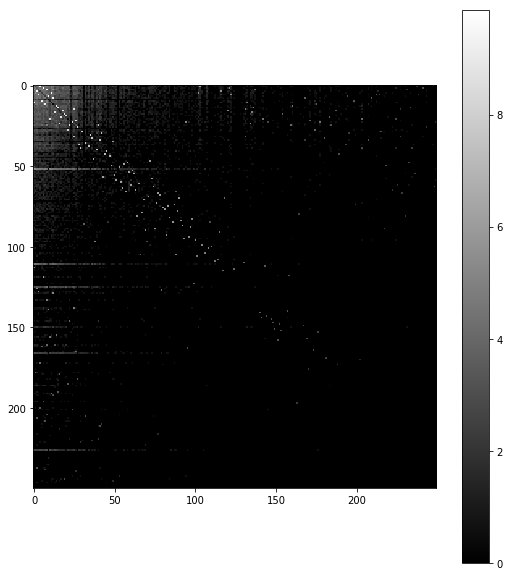

In [10]:
ca.plot_gr(grs[:250,:250], s =14, log =1)

In [15]:
arrs, ws = ca.restore_arrays(grs[:300,:300])

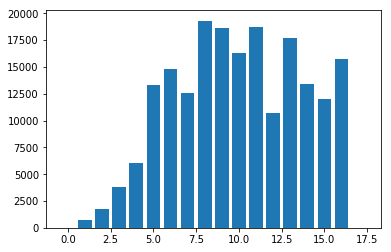

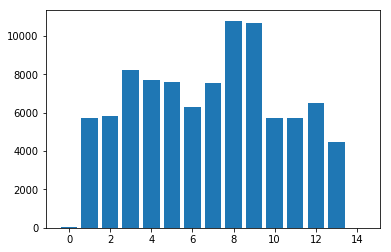

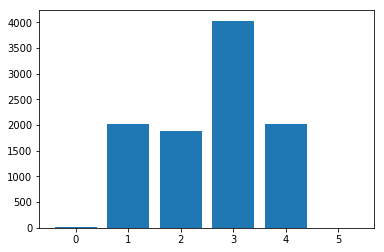

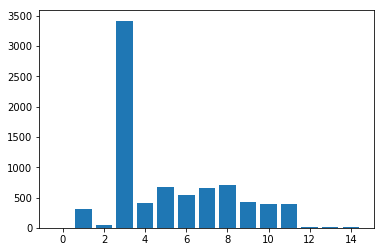

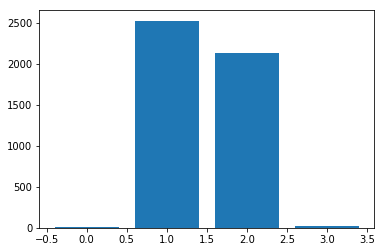

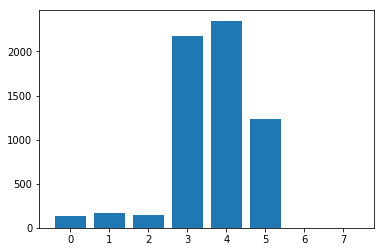

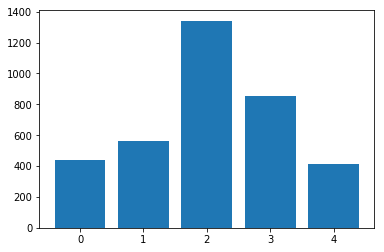

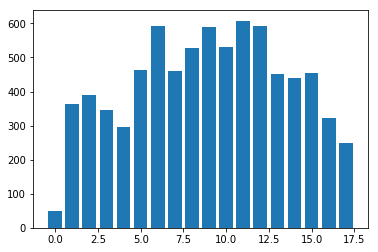

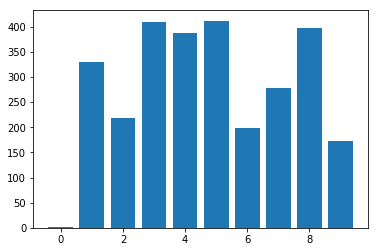

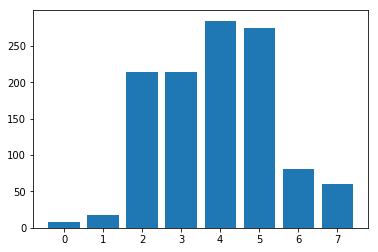

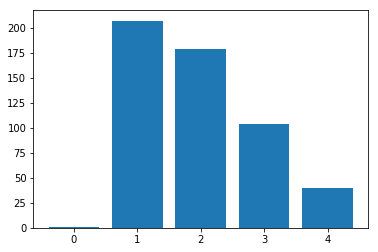

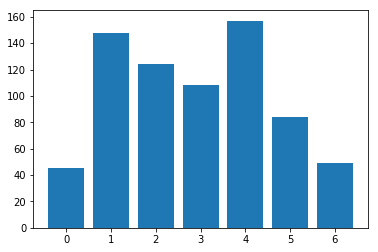

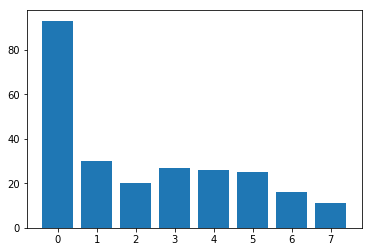

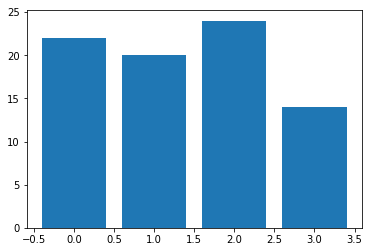

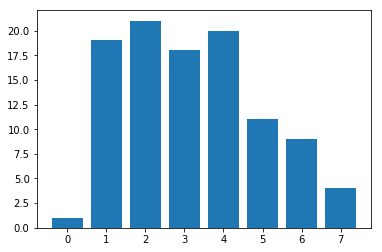

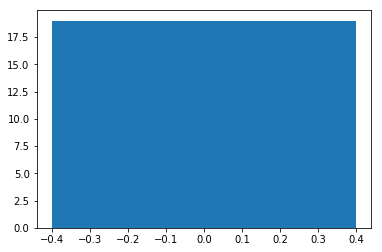

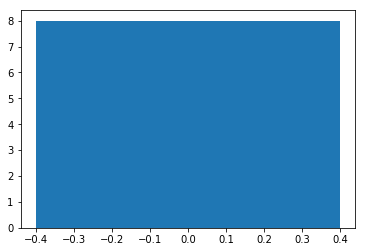

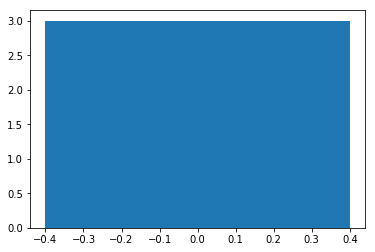

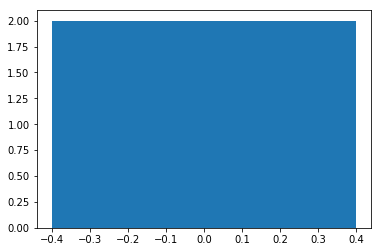

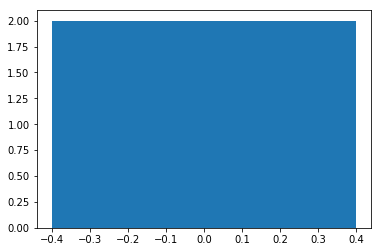

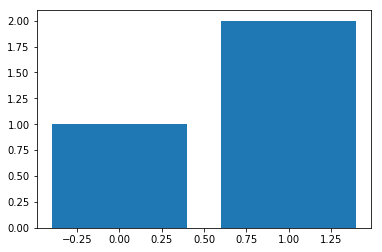

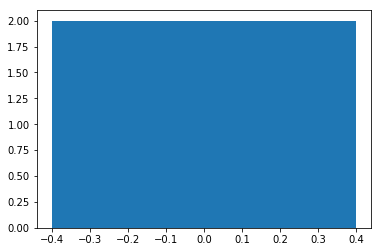

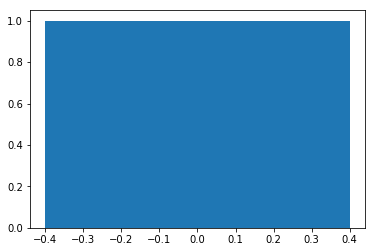

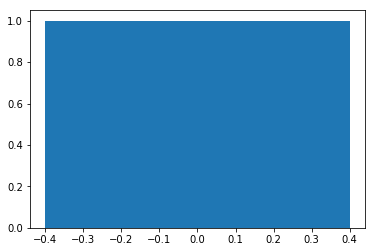

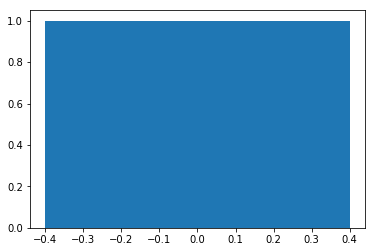

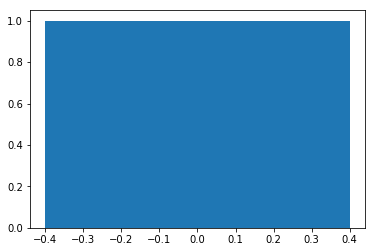

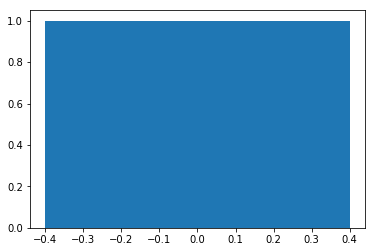

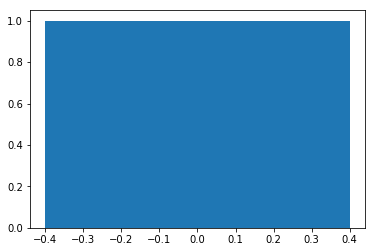

In [17]:
for w in ws:
    plt.bar(np.arange(len(w)), w)
    plt.show()